# EnE Modelling and Advanced Data Science Pre-work

**Audience:** Students taking the MQB Mathematical Modelling in E&E and Advanced Data Science sections    
**Tools (optional):** NumPy, Matplotlib, SymPy.

```{tip} How to use
- Attempt the questions *by hand first*.  
- Use the optional Python cells to check algebra, plot functions, or verify numerical results.
- Check your answers in the [Solutions notebook](mqb-prework-solutions.ipynb).
```

---

# 1. Functions & graphs

Focus: plotting, power laws, exponentials/logs, and trigonometric functions.


## Exercise 1

**Radial disease spread (polynomial in time).**  
A fungal disease starts at the centre of an orchard and spreads *radially* at a constant speed $v$ (m/day).  

1. Write the infected radius $r(t)$ and infected area $A(t)$ as functions of time $t$ (days). 
2. Show that $A(t)$ is a polynomial in $t$, and state its degree.  
3. If you measure time in **weeks** instead, $t_w=t/7$, rewrite $A$ as a function of $t_w$.

Take $v=3$ m/day and compute $A(2)$, $A(4)$, $A(8)$ in m$^2$.

**Optional Python check:**

In [2]:
import numpy as np

v = 3  # m/day
t = np.array([2,4,8], dtype=float)
r = v*t
A = np.pi*r**2
A


array([ 113.09733553,  452.38934212, 1809.55736847])

## Exercise 2

**Allometric scaling (power laws).**  
Plant traits typically follow scaling relations {cite}`niklas1994plantallometry`. Suppose:

- leaf area $L$ is proportional to stem diameter $D$ via $L = k D^{1.84}$  
- spongy mesophyll volume fraction $S$ is proportional to leaf thickness $T$ via $S = c T^{-0.49}$

1. Sketch (qualitatively) how $L$ changes with $D$, and how $S$ changes with $T$.  
2. Using log–log axes, explain how you could estimate the exponent from data.  
3. For $k=1$, compute $L$ when $D=1,2,4$. For $c=1$, compute $S$ when $T=1,2,4$.

**Optional Python check:**

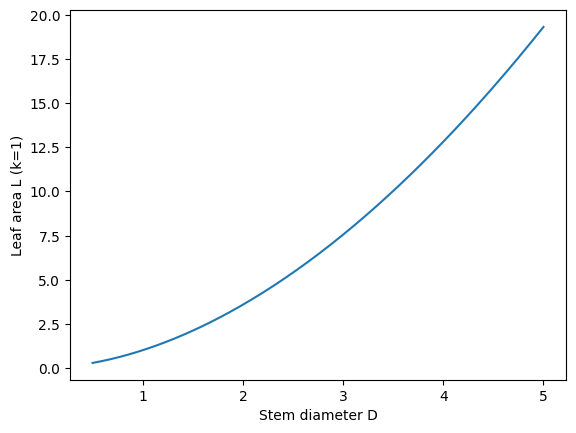

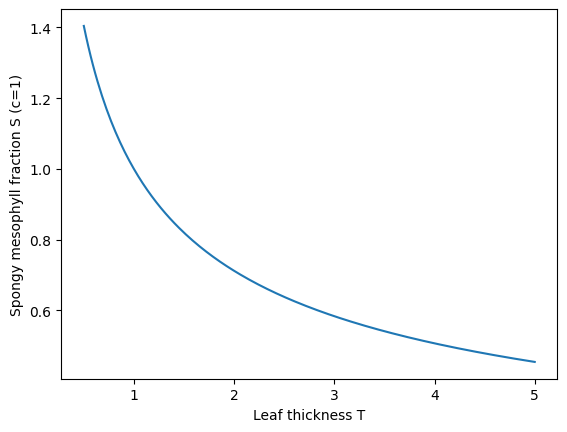

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D = np.linspace(0.5, 5, 200)
T = np.linspace(0.5, 5, 200)

L = D**1.84
S = T**(-0.49)

plt.figure()
plt.plot(D, L)
plt.xlabel("Stem diameter D")
plt.ylabel("Leaf area L (k=1)")
plt.show()

plt.figure()
plt.plot(T, S)
plt.xlabel("Leaf thickness T")
plt.ylabel("Spongy mesophyll fraction S (c=1)")
plt.show()


## Exercise 3

**Exponentials, logs, and half-lives.**  
A bacterial population is exposed to a toxin; viable cells decline as $N(t)=N_0(1/2)^{t/h}$, where $h$ is the half-life.

1. Rewrite this as $N(t)=N_0 e^{-\mu t}$ and express $\mu$ in terms of $h$.  
2. If $h=6$ hours and $N_0=10^8$, compute $N(3)$, $N(6)$, $N(12)$.  
3. Explain (in words) what $\mu$ represents biologically.

**Optional Python check:**

In [4]:
import numpy as np

N0 = 1e8
h = 6.0
t = np.array([3,6,12], dtype=float)

N = N0*(0.5)**(t/h)
N

array([70710678.11865476, 50000000.        , 25000000.        ])

## Exercise 4

**Oscillations and seasonality.**  
A zooplankton abundance time series shows seasonal oscillations. Model it as
$$
Z(t)=Z_0 + A\cos(\omega t + \phi).
$$

1. Describe the role of $Z_0$, $A$, $\omega$, and $\phi$.  
2. If the period is 12 months, what is $\omega$ (in radians/month)?  
3. Plot $Z(t)$ over 24 months for $Z_0=50$, $A=20$, $\phi=0$ and compare $\omega$ vs $2\omega$ (higher frequency).

**Optional Python check:**

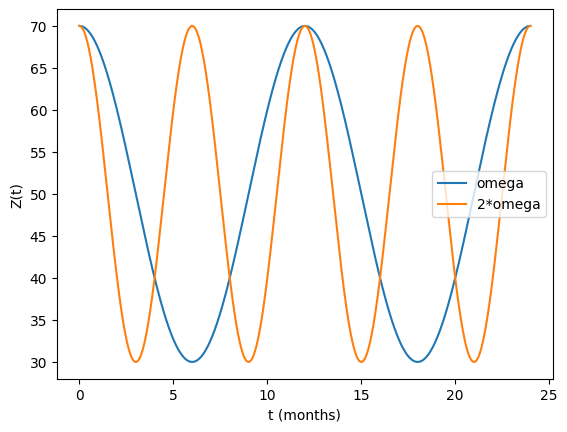

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Z0, A, phi = 50, 20, 0
t = np.linspace(0, 24, 1000)  # months
omega = 2*np.pi/12

Z1 = Z0 + A*np.cos(omega*t + phi)
Z2 = Z0 + A*np.cos(2*omega*t + phi)

plt.figure()
plt.plot(t, Z1, label="omega")
plt.plot(t, Z2, label="2*omega")
plt.xlabel("t (months)")
plt.ylabel("Z(t)")
plt.legend()
plt.show()


---

# 2. Calculus (limits, differentiation, integration, Taylor series)

Focus: turning biological definitions into derivatives/integrals; approximations.


## Exercise 1

**Limits and per-capita growth.**  
A population has size $N(t)$. Define the *instantaneous per-capita growth rate* as
$$
r(t)=\lim_{\Delta t\to 0}\frac{1}{N(t)}\frac{N(t+\Delta t)-N(t)}{\Delta t}.
$$

1. Show that $r(t)=\frac{1}{N(t)}\frac{dN}{dt}$.  
2. If $N(t)=N_0 e^{rt}$, compute $r(t)$ and interpret the result.  
3. If $N(t)$ is decreasing, what sign would you expect for $r(t)$?

**Optional Python check:**

In [6]:
import sympy as sp
t, r_sym, N0 = sp.symbols('t r N0', positive=True)
N = N0*sp.exp(r_sym*t)
r_of_t = sp.diff(N,t)/N
sp.simplify(r_of_t)


r

## Exercise 2

**Differentiation and optimisation (resource uptake).**  
A microbial uptake rate follows a saturating function
$$
U(r)=\frac{U_{\max} r}{K + r},
$$
where $r$ is resource concentration.

1. Compute $dU/dr$ and show it is positive.  
2. Show that $U(r)\to U_{\max}$ as $r\to\infty$.  
3. Find $r$ such that $U(r)=U_{\max}/2$ and interpret $K$.

**Optional Python check:**

In [7]:
import sympy as sp
r, Umax, K = sp.symbols('r Umax K', positive=True)
U = Umax*r/(K+r)
dU = sp.diff(U, r)
sp.simplify(dU)


K*Umax/(K + r)**2

## Exercise 3

**Integration (total biomass produced).**  
Suppose net primary production (NPP) in an ecosystem varies seasonally:
$$
\text{NPP}(t)=a + b\cos(\omega t),
$$
where $t$ is time in years.

1. Compute the total production over one year: $\int_0^1 \text{NPP}(t)\,dt$.  
2. What is the average NPP over the year?  
3. Explain why the cosine term integrates to zero over a whole number of periods.

**Optional Python check:**

In [8]:
import sympy as sp
t, a, b, omega = sp.symbols('t a b omega', positive=True)
NPP = a + b*sp.cos(omega*t)
sp.integrate(NPP, (t, 0, 1))


a + b*sin(omega)/omega

## Exercise 4

**Taylor series (logistic growth approximation).**  
The logistic growth model is
$$
\frac{dN}{dt}=rN\left(1-\frac{N}{K}\right).
$$

1. For small $N/K$, expand $1-\frac{N}{K}$ and interpret the approximation.  
2. Using a Taylor expansion of $\ln(1+x)$ around $x=0$, show how you would approximate $\ln\left(1-\frac{N}{K}\right)$ when $N\ll K$.  
3. Explain (biologically) when this approximation might be justified.

**Optional Python check:**

In [9]:
import sympy as sp
x = sp.symbols('x')
sp.series(sp.log(1+x), x, 0, 4)


x - x**2/2 + x**3/3 + O(x**4)

---

# 3. Linear algebra (matrices, eigenvalues/eigenvectors)

Focus: matrix algebra for biological transitions/constraints; eigen-ideas for long-run behaviour.


## Exercise 1

**Matrix multiplication in population transitions.**  

A 2-stage population (juveniles $J$, adults $A$) evolves as

$$
\begin{pmatrix} J_{t+1}\\ A_{t+1}\end{pmatrix} =
\begin{pmatrix} 0 & f\\ s & g\end{pmatrix} \begin{pmatrix} J_t\\ A_t\end{pmatrix}.
$$

1. Interpret $f, s, g$ biologically.  
2. Compute $(J_{t+1},A_{t+1})$ for $f=3$, $s=0.2$, $g=0.8$ given $(J_t,A_t)=(10,5)$.  
3. Compute the matrix product explicitly (by hand), then verify with Python.

**Optional Python check:**

In [10]:
import numpy as np
M = np.array([[0, 3.0],[0.2, 0.8]])
x = np.array([10.0, 5.0])
M @ x


array([15.,  6.])

## Exercise 2

**Eigenvalues and long-run growth (Leslie-type model).**  
For the matrix $M=\begin{pmatrix}0&3\\0.2&0.8\end{pmatrix}$:

1. Find the eigenvalues of $M$.  
2. Which eigenvalue determines the long-run growth rate, and why?  
3. Find an eigenvector corresponding to the dominant eigenvalue and interpret it as a stable stage distribution (up to scaling).

**Optional Python check:**

In [12]:
import sympy as sp
M = sp.Matrix([[0, 3],[sp.Rational(1,5), sp.Rational(4,5)]])
M.eigenvects()

[(2/5 - sqrt(19)/5,
  1,
  [Matrix([
   [-sqrt(19) - 2],
   [            1]])]),
 (2/5 + sqrt(19)/5,
  1,
  [Matrix([
   [-2 + sqrt(19)],
   [            1]])])]

## Exercise 3

**Inverses and solving linear systems (metabolic fluxes).**  

Suppose two metabolic fluxes $x, y$ satisfy:
$$
\begin{aligned}
 3x-7y &= 4\\
 x+7y &= 10
\end{aligned}
$$

1. Write this as $A\mathbf{z}=\mathbf{b}$.  
2. Compute $A^{-1}$ and hence $\mathbf{z}=A^{-1}\mathbf{b}$.  
3. Verify numerically.

**Optional Python check:**

In [13]:
import sympy as sp
A = sp.Matrix([[3,-7],[1,7]])
b = sp.Matrix([4,10])
z = A.LUsolve(b)
A.inv(), z


(Matrix([
 [  1/4,  1/4],
 [-1/28, 3/28]]),
 Matrix([
 [  7/2],
 [13/14]]))

## Exercise 4

**Complex numbers and oscillations (optional stretch).**  
Many linear systems have solutions involving $e^{(\alpha+i\beta)t}$.

1. Using Euler's formula, show that $e^{i\beta t}=\cos(\beta t)+i\sin(\beta t)$.  
2. Explain why complex eigenvalues imply oscillations in real-valued solutions.  
3. Consider $x''+\beta^2 x=0$. Solve it using the Ansatz $x(t)=e^{\lambda t}$ and relate $\lambda$ to $\pm i\beta$.

**Optional Python check:**

In [14]:
import sympy as sp
t, beta = sp.symbols('t beta', positive=True, real=True)
sp.exp(sp.I*beta*t).expand(complex=True)


I*sin(beta*t) + cos(beta*t)

---

# 4. Differential equations (equilibria, stability, phase-plane intuition)

Focus: 1D and 2D dynamical systems used throughout quantitative biology.


## Exercise 1

**Exponential growth ODE.**  
A bacterial population grows as $\frac{dN}{dt}=rN$.

1. Solve for $N(t)$ given $N(0)=N_0$.  
2. Define the doubling time $T_d$ such that $N(T_d)=2N_0$. Express $T_d$ in terms of $r$.  
3. If $r=0.4\ \text{h}^{-1}$, compute $T_d$.

**Optional Python check:**

In [17]:
import sympy as sp
r = sp.Rational(2,5)  # 0.4
Td = sp.log(2)/r
float(Td)


1.7328679513998633

## Exercise 2

**Logistic growth and equilibria.**  
$$
\frac{dN}{dt}=rN\left(1-\frac{N}{K}\right).
$$

1. Find the equilibria.  
2. Determine their stability by considering the sign of $dN/dt$ around each equilibrium.  
3. Sketch $dN/dt$ as a function of $N$.

**Optional Python check:**

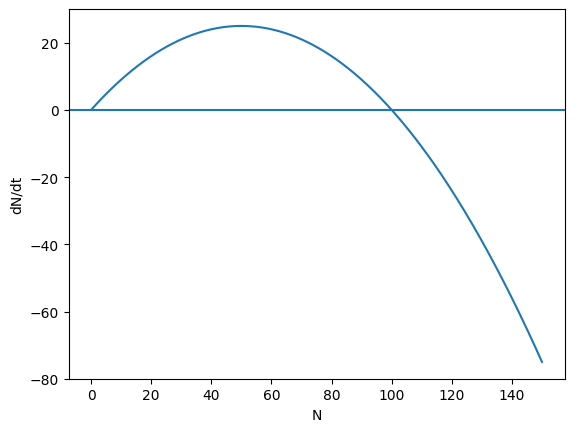

In [18]:
import numpy as np
import matplotlib.pyplot as plt

r, K = 1.0, 100.0
N = np.linspace(0, 150, 400)
dN = r*N*(1 - N/K)

plt.figure()
plt.axhline(0)
plt.plot(N, dN)
plt.xlabel("N")
plt.ylabel("dN/dt")
plt.show()


## Exercise 3

**Predator–prey linearisation (2D phase plane intuition).**  
A simplified predator–prey model near an equilibrium can be approximated by a linear system
$$
\frac{d}{dt}\begin{pmatrix}x\\y\end{pmatrix}
=
A\begin{pmatrix}x\\y\end{pmatrix},
\quad
A=\begin{pmatrix}0&1\\-2&-0.4\end{pmatrix}.
$$

1. Compute the eigenvalues of $A$.  
2. From the eigenvalues, classify the equilibrium (node/spiral/saddle) and predict whether trajectories oscillate.  
3. (Optional) Simulate trajectories for a few initial conditions and plot $y$ vs $x$.

**Optional Python check:**

In [19]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0,1],[-2,-0.4]])
eigvals, eigvecs = np.linalg.eig(A)
eigvals


array([-0.2+1.4j, -0.2-1.4j])

## Exercise 4

**Integrating factor (harvesting / forcing).**  
A fish stock $N(t)$ experiences natural growth and constant harvesting:
$$
\frac{dN}{dt}=rN - H,
$$
with constants $r>0$, $H>0$.

1. Solve this ODE using an integrating factor.  
2. Find the equilibrium $N^*$ and interpret when it is biologically feasible.  
3. If $N(0)=N_0$, derive the condition on $H$ for which the stock never crosses zero (no extinction in the deterministic model).

**Optional Python check:**

In [20]:
import sympy as sp
t, r, H, N0 = sp.symbols('t r H N0', positive=True)
N = sp.Function('N')
ode = sp.Eq(sp.diff(N(t), t), r*N(t) - H)
sp.dsolve(ode, ics={N(0): N0})


Eq(N(t), H/r + (-H + N0*r)*exp(r*t)/r)

---

# 5. Probability & distributions

Focus: expectation/variance and common distributions used in modelling and inference.


## Exercise 1

**Random variables and expectation (offspring number).**  
Let $X$ be the number of offspring produced by an individual in a season.

1. Define $E[X]$ in terms of $P(X=x)$.  
2. If $X\sim\text{Poisson}(\lambda)$, state $E[X]$ and $\mathrm{Var}(X)$.  
3. If $\lambda=1.5$, compute $P(X=0)$, $P(X\ge 2)$.

**Optional Python check:**

In [21]:
import numpy as np
import math

lam = 1.5
P0 = math.exp(-lam)
P1 = lam*math.exp(-lam)
Pge2 = 1 - (P0 + P1)
P0, Pge2


(0.22313016014842982, 0.44217459962892547)

## Exercise 2

**Binomial sampling (infection prevalence).**  
In a sample of $n$ hosts, each is infected with probability $p$ independently. Let $Y\sim\text{Binomial}(n,p)$.

1. State $E[Y]$ and $\mathrm{Var}(Y)$.  
2. For $n=50$, $p=0.1$, compute $E[Y]$, $\mathrm{Var}(Y)$, and $P(Y=0)$.  
3. Interpret $P(Y=0)$ in the context of field surveys.

**Optional Python check:**

In [22]:
import math
n, p = 50, 0.1
EY = n*p
VarY = n*p*(1-p)
P0 = (1-p)**n
EY, VarY, P0


(5.0, 4.5, 0.00515377520732012)

## Exercise 3

**Gaussian measurement error (trait values).**  
Suppose measured leaf length $L_m$ equals true length $L$ plus error $\epsilon$, where $\epsilon\sim\mathcal{N}(0,\sigma^2)$.

1. Write the density of $L_m\mid L$.  
2. If you take $k$ independent replicate measurements and average them, what happens to the variance of the average?  
3. Explain why replication improves precision.

**Optional Python check:**

In [23]:
import sympy as sp
Lm, L, sigma = sp.symbols('Lm L sigma', positive=True, real=True)
pdf = (1/(sp.sqrt(2*sp.pi)*sigma))*sp.exp(-(Lm-L)**2/(2*sigma**2))
pdf


sqrt(2)*exp(-(-L + Lm)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

## Exercise 4

**Joint, marginal, conditional probabilities (two species).**  
Two species ($A$, $B$) can each be present (1) or absent (0) in a habitat patch.

1. Define a joint distribution $P(A,B)$ over the four outcomes.  
2. Show how to compute the marginal $P(A=1)$ from $P(A,B)$.  
3. Define $P(A=1\mid B=1)$.  
4. Explain (in words) how $P(A=1\mid B=1)$ relates to co-occurrence and (possible) interaction.

**Optional Python check:**

In [24]:
# Optional: pick numbers and verify marginals sum correctly
import numpy as np

# Example joint distribution table: rows A=0,1; cols B=0,1
P = np.array([[0.30, 0.10],
              [0.20, 0.40]])
P.sum(), P[1,:].sum(), P[:,1].sum(), P[1,1]/P[:,1].sum()


(np.float64(1.0),
 np.float64(0.6000000000000001),
 np.float64(0.5),
 np.float64(0.8))

---

# 6. Optimisation & likelihood

Focus: interpreting likelihood spaces and optimisation over parameters (frequent pain points).


## Exercise 1

**Minimising squared error (metabolic rate scaling).**  
You measure metabolic rate $B$ and body mass $M$ and hypothesise a power law $B=aM^b$. Taking logs gives:
$$
\log B = \log a + b\log M.
$$
Let $y_i=\log B_i$ and $x_i=\log M_i$. Fit the line $y=\beta_0+\beta_1 x$ by minimising
$$
S(\beta_0,\beta_1)=\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)^2.
$$

1. Take partial derivatives of $S$ wrt $\beta_0, \beta_1$ and write the normal equations.  
2. Explain how this is an optimisation problem over a 2D parameter space.  
3. (Optional) Solve the normal equations for $(\beta_0,\beta_1)$ in terms of sample means.

**Optional Python check:**

In [25]:
import sympy as sp
b0, b1 = sp.symbols('b0 b1')
# symbolic normal equations for generic data would be done by writing sums; see solutions notebook for steps.


## Exercise 2

**Likelihood surface (single-parameter Poisson).**  
You observe counts of offspring per individual: $x_1,\dots,x_n$, and model them as Poisson($\lambda$).

1. Write the likelihood $L(\lambda)$ and log-likelihood $\ell(\lambda)$.  
2. Differentiate $\ell(\lambda)$ and find the MLE $\hat\lambda$.  
3. Explain what the "height" of a 1D likelihood curve represents.  
4. For data $[0,1,0,2,1]$, compute $\hat\lambda$ and plot $\ell(\lambda)$ for $\lambda\in[0.01,4]$.

**Optional Python check:**

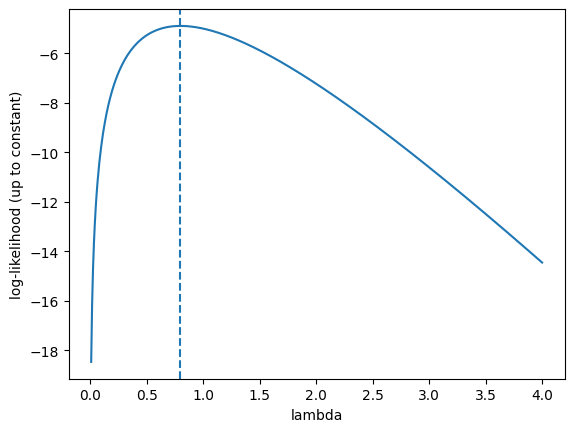

np.float64(0.8)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,0,2,1])
lam_hat = x.mean()

lam = np.linspace(0.01, 4, 500)
# log-likelihood up to an additive constant (drop -log(x_i!))
ell = (x.sum())*np.log(lam) - len(x)*lam

plt.figure()
plt.plot(lam, ell)
plt.axvline(lam_hat, linestyle='--')
plt.xlabel("lambda")
plt.ylabel("log-likelihood (up to constant)")
plt.show()

lam_hat


## Exercise 3

**Two-parameter likelihood and contours (Gaussian mean/variance).**  
Suppose trait measurements $y_1,\dots,y_n$ are i.i.d. Normal($\mu,\sigma^2$).

1. Write the log-likelihood $\ell(\mu,\sigma)$.  
2. State the MLEs $\hat\mu$ and $\hat\sigma^2$.  
3. Explain why a 2D likelihood can be visualised via contour lines over $(\mu,\sigma)$.  
4. (Optional) For data $[2.1, 2.4, 1.9, 2.0, 2.3]$, plot a contour map of $\ell(\mu,\sigma)$.

**Optional Python check:**

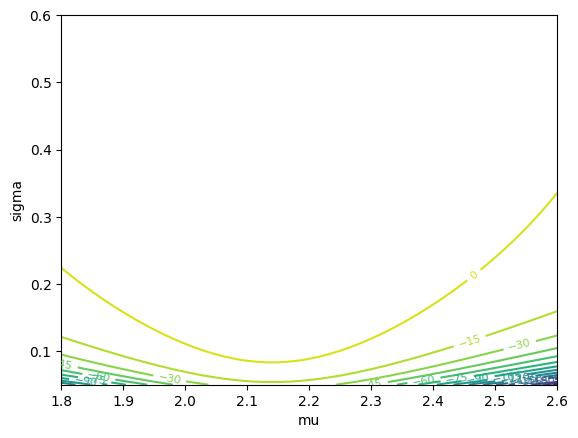

(np.float64(2.1399999999999997), np.float64(0.18547236990991403))

In [27]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([2.1, 2.4, 1.9, 2.0, 2.3])
mu_grid = np.linspace(1.8, 2.6, 120)
sig_grid = np.linspace(0.05, 0.6, 120)
MU, SIG = np.meshgrid(mu_grid, sig_grid)

n = len(y)
# log-likelihood
LL = -n*np.log(SIG) - 0.5*np.sum(((y.reshape(1,1,-1)-MU[...,None])/SIG[...,None])**2, axis=-1)

plt.figure()
cs = plt.contour(MU, SIG, LL, levels=15)
plt.clabel(cs, inline=True, fontsize=8)
plt.xlabel("mu")
plt.ylabel("sigma")
plt.show()

y.mean(), y.std(ddof=0)


## Exercise 4

**Constraints (biologically feasible parameter values).**  
In many models parameters must be positive (rates, variances, concentrations).

1. Give two examples of biological parameters that are constrained to be $>0$.  
2. Suppose you are fitting $N(t)=N_0e^{- \mu t}$ but your optimiser returns $\mu<0$. What biological behaviour would that imply?  
3. Show how to reparameterise $\mu=e^\theta$ to enforce positivity, and explain how this changes the optimisation problem.

**Optional Python check:**

In [28]:
import sympy as sp
theta = sp.symbols('theta', real=True)
mu = sp.exp(theta)
mu


exp(theta)